<a href="https://colab.research.google.com/github/LuisaBeccar/Proyecto_DC_CoderHouse_LuisaBeccarVarela/blob/main/Septiembre_DCII_LuisaBeccarVarela_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

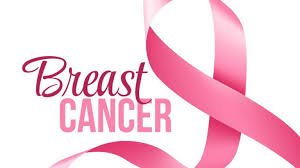

# Supervivencia a 5 años del diagnóstico <br>


> **CODER HOUSE**  <br>
> Data Science: Machine Learning para la ciencia de datos II <br>
> Comision 61145<br>

por Luisa Beccar Varela

# Contexto - Audiencia - Limitaciones
<br>

**Contexto:**
  Dado que el cáncer de mama es el cáncer más diagnosticado en mujeres argentinas (19,6%) y su mayor causa de mortalidad (16,4/100000), y teniendo personalmente varias familiares que padecieron la enfermedad, algunas que sobrevivieron muchos años tras el diagnostico y otras en quienes fue fatal, busco con este análisis responder a la pregunta: ¿Sobrevivirá una mujer más de 5 años tras el diagnóstico de esta enfermedad?. Determine el lapso de 5 años de manera totalmente arbitraria, pensando que es una bunea cantidad de tiempo que un medico puede proveerle a las pacientes como pronostico para que ellas tengan de perspectiva y poder organizar el tiempo de vida que les queda.

**Audiencia:**
  En principio la respuesta a la pregunta sería de interés para el médico, ginecologo mastologo, responsable de informar los resultados a la pacientes y ademas proponer un tratamiento. Me pareceria fundamental evaluar tratamiento y los efectos adversos que pueda llegar a generar en la calidad de vida de la paciente segun el pronostico que ella tenga. Las pacientes recibiendo la información podrían beneficiarse al conocer el pronóstico y poder tomar decisiones  acerca de cómo seguir con sus vidas en el tiempo informado.

**Limitaciones:**
  La base de datos se tomó de mujeres en Estados Unidos de entre 30 y 69 años de edad,  con carcinoma ductal infiltrante y carcinoma lobular, entre 2006 y 2010, excluyendo paciente con tamaño tumoral desconocido, sin ganglios regionales examinados y sin ganglios examinados positivos y que sobrevivieron menos de 1 mes del diagnóstico. La base no cuenta con ciertos marcadores tumorales que son importantes para el diagnóstico y pronóstico del cáncer de mama: Her2. Ademas, no brinda informacion de si las pacientes diagnosticads recibieron algún tratamiento o no, ni cual. Tambien podria mencionarse que las razas de EEUU quizas no sean las mismas que la poblacion argentina, pero ignoraremos ese tema ya que tampoco contamos con un analisis de raza para las mujeres con cancer de mama en Argentina.
<br>


# Hipotesis

**Pregunta principal**
<br>
¿Sobrevivirá la paciente más de 5 años tras el diagnóstico de cáncer de mama, dadas sus características personales y del tumor?
<br>

**Preguntas secundarias**

1.  ¿Se relaciona el 6th Stage con los meses de supervivencia?

2.  ¿De que manera influye la presencia de marcadores hormonales en los meses de supervivencia?

3.  ¿Tienen los tumores de menor diferenciación menor supervivencia?

4.  ¿Existe relación entre la edad de la mujer al diagnóstico y su sobrevida?  


# Base de Datos
<br>

**Repositorio:**  https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

<br>

**Documentacon oficial de la base de datos**:  
https://ieee-dataport.org/open-access/seer-breast-cancer-data
<br>


### ***Atributos de la base orignal "Breast Cancer":**

- **Age** (edad): edad de los sujetos: 30-69 años <br>
- **Race** (raza): raza de los sujetos: White, Black, Other (American Indian/AK Native, Asian/Pasific Islander) <br>
- **Marital Status** (estado civil): Married (casado), Single (soltero), Divorced (divorciado), Widowed (enviudado), Separated (separado) <br>
- **T Stage** (estadio T): clasificacion tumoral segun tamaño de la masa tumoral: T1, T2, T3, T4 *<br>
- **N Stage** (estadio N): clasificacion tumoral segun nodulos linfaticos afectados por tumor: N1, N2, N3 * <br>
- **6th Stage** (estadio clinico): en base al T, N y M: IIA, IIB, IIIA, IIIB, IIIC * <br>
- **Differrentiate** (grado de diferenciacion): de las celulas del tumor observadas en la biopsia: Poorly differentiated, Moderately differentiated, Well differentiated, Undifferentiated. Luego le corregí el nombre de la variable a "Differentiate"
- **Grade**: grado del tumor segun caracteristicas su celulas: 1, 2, 3, 4 o anaplasico * <br>
- **A Stage**: estadio de diseminacion: Regional o Distant (diseminado) con metastasis a distancia. <br>
- **Tumor Size** (tamaño tumoral): en milimetros (de 1  a 140mm) <br>
- **Estrogen Status** (estado estrogenico): si tiene receptores hormonaes estrogenicos o no: Positive o Negative <br>
- **Progesterone Status** (estado progestageno): si tiene receptores hormonaes de progesterona o no: Positive o Negative <br>
- **Regional Node Examined**: numero de nodulos linfaticos regionales examinados (1-61 nodulos) <br>
- **Reginol Node Positive**: cantidad de ganglios regionales examinados que resultaron positivos a malignidad (1 a 46) - Luego le corregí el nombre a "Regional Node Positive" <br>
- **Survival Months**: meses de sobrevida del suejeto (1 a 107)  <br>
- **Status**: estado actual: Alive (vivo) o Dead (murió) <br>
<br>

-----------
Dichas variables se pueden clasificar en:
<br>

*   Atributos cuantitativos:<br>
      *   Continuos (3): Age, Tumor Size, Survival Months <br>
      *   Discretos (2): Regional Node Examined, Regional Node Positive <br>

*   Atributos categoricos:<br>
      * Nominales:<br>
          - Binarios (5): Estrogen Status, Progesterone Status, Status, A State, Sobrevida. <br>
          - Multicategoricos (2): Race, Marital Status. <br>
      * Ordinales (4): N Stage, 6th Stage, Differentiate, Grade <br>





## Consideraciones para la interpretacion:

Info de Estadificacion de Cancer de Mama:
https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/stages-of-breast-cancer.html


<br>

Se creara la variable objetivo (**target feature**) **Sobrevida**: cualitativa binaria: True (1) si la paciente tuvo Survival Months mayor o igual a 60 meses, y  False (0) si sus Survival Months fueron menores de 60 meses.

<br>

Conociendo que hay ciertas relaciones entre las variables, propongo considerer lo siguiente: <br>

- La cantidad de Regional Node Examined determina directamente la maxima cantidad de Regional Node Positive. Por lo tanto propongo crear una nueva variable: **RNP/RNE**. Y conservar solo la variable RNE. <br>

- Tumor Size y T Stage estan relacionadas ya que las categorias de T Stage se establen según el tamaño tumoral(mm), excepto para la categoria T4 donde puede tener el tumor cualquier tamaño. <br>

- 6th Stage es una combinacion de las clasificaciones T N A Stage, Differentiate, Estrogen Status y Progesterone Status, por lo cual podria utilizarse en resumen de dichas variables en conjunto. <br>

- Grade y Differentiate son el mismo criterio de clasificacion, por lo cual eliminaré una de las dos para evitar redundancia. (Elijo eliminar Grade y conservar Differentiate).<br>

- Status: indica si la paciente falleció o no (al momento de la toma de datos para la base). Como no tenemos informacion de si esa muerte fue por la enfermedad o por otras causas, no considerare esa variable en mi analisis y me basaré solamene en los meses de supervivencia al diagnostico. <br>



In [ ]:
# importo librerias

import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



! pip install dask[dataframe]

import sys
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 4.8 MB/s eta 0:00:00


# Descarga de dataset con API

In [ ]:
! pip install -q kaggle
! gdown --id 1ZPZWVpctDMeiT4dFm29xQmQG44Srx0ha
# el id es la parte del codigo entre barras, copio y pego
# con gdown descargo archivos desde el drive sin tener que hacer la conecccion completa

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZPZWVpctDMeiT4dFm29xQmQG44Srx0ha
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 234kB/s]


In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle dataset list # para chequear que todo esta bien

usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [ ]:
! kaggle datasets download -d reihanenamdari/breast-cancer # en keagle pongo 3puntitos copy api command y lo pego (-d...)

Dataset URL: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/42.8k [00:00<?, ?B/s]
100% 42.8k/42.8k [00:00<00:00, 53.0MB/s]


In [ ]:
# ahi me  da el url de donde se guardo, como zip, agrego el /content/ adelante
path = "/content/breast-cancer.zip"


In [ ]:
# des zippeo
! unzip $path


Archive:  /content/breast-cancer.zip
  inflating: Breast_Cancer.csv       


In [ ]:
df = pd.read_csv("/content/Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


# Descarga por URL

In [ ]:
# usar solo en caso de pereza de hacer la descarga por API
url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
df = pd.read_csv(url)
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# Exploratory Analysis

In [ ]:
display(df.info())

display(df.describe())

display(df.describe(include=object))

display(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

None

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,4,2,2,2,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3413,2643,1786,2732,1305,2351,2351,3932,3755,3326,3408


,0
Age,False
Race,False
Marital Status,False
T Stage,False
N Stage,False
6th Stage,False
differentiate,False
Grade,False
A Stage,False
Tumor Size,False


Con estos 3 comandos obtenemos una breve descripción de la base: tenemos 2024 observaciones y 16 variables.  Para cada variable podemos ver que tipo de dato es: tenemos 11 tipo objeto, que luego veremos de transformar en categorias, y 5 integers (numeros enteros). Ninguna categoria tiene datos faltantes.
<br>
Luego con los describe vemos las medidas de distribucion que caracterizan cada tipo de variable (integer o object).

# Data Wrangling

Aqui efectuare ciertas modificaciones a las variables y correcciones en los inputs:

In [ ]:
# Creacion de mi variable objetivo, y edicion de otras features

# Agrego variable objetivo Sobrevida si "survival months" > 60 meses (5 años)

"""Sobrevida = []
for i in df["Survival Months"]: #para cada elemento de "survival months", evalua si es mayor a 60 meses (5 años) (TRUE) y el resultado booleano (TRUE O FALSE) agregalo a la lista "Sobrevida"
    Sobrevida.append(i >= 60)
Sobrevida = pd.Series(Sobrevida)
df["Sobrevida"] = Sobrevida
"""

df['Sobrevida'] = np.where(df['Survival Months'] >= 60, 1, 0)

# modificar el nombre de Reginol Node Positive por Regional Node Positive
df.rename(columns={'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

# modificar el nombre de "differentiate" por "Differentiate" sin espacio final
df.rename(columns={'differentiate':'Differentiate'}, inplace=True)

# eliminar la columna Grade porque habla de lo mismo que Differentiate
df.drop('Grade', axis=1, inplace=True)

# eliminar la columna Marital Status ya que no creemos sea relevante
df.drop('Marital Status', axis=1, inplace=True)


# eliminar la columna Status ya que no creemos sea relevante
df.drop('Status', axis=1, inplace=True)

# relacion RNP y RNE: ya que el maximo de RNP depende de RNE
df["RNP/RNE"] = df["Regional Node Positive"] / df["Regional Node Examined"]



In [ ]:
#  nombre de columnas sin espacios en blanco antes o despues
columnas = df.columns

for columna in columnas:
    sin_espacio = columna.strip()
    if sin_espacio!=columna:
        df= df.rename(columns = {columna: sin_espacio})


In [ ]:
# valores con espacio al final: funcion para sacar espacion pre y post strings de objetos

def whitespace_remover(miDataFrame): # defino la funcion
    for i in miDataFrame.columns:  # para cada columna
        if miDataFrame[i].dtype == 'object': # chequiar que sea tipo objeto
            miDataFrame[i] = miDataFrame[i].map(str.strip) # aplicarle la fx strip asl string
        else: # si no es objeto el dato pasa al siguiente
            pass

whitespace_remover(df)


Una vez hecho eso, repito el análisis del data frame corregido:

In [ ]:
display(df.info())

display(df.describe(percentiles=[i/10 for i in range(1, 10)] + [0.01, 0.99, 0.25, 0.75]))

display(df.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   T Stage                 4024 non-null   object 
 3   N Stage                 4024 non-null   object 
 4   6th Stage               4024 non-null   object 
 5   Differentiate           4024 non-null   object 
 6   A Stage                 4024 non-null   object 
 7   Tumor Size              4024 non-null   int64  
 8   Estrogen Status         4024 non-null   object 
 9   Progesterone Status     4024 non-null   object 
 10  Regional Node Examined  4024 non-null   int64  
 11  Regional Node Positive  4024 non-null   int64  
 12  Survival Months         4024 non-null   int64  
 13  Sobrevida               4024 non-null   int64  
 14  RNP/RNE                 4024 non-null   

None

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,Sobrevida,RNP/RNE
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962,0.701044,0.326468
std,8.963134,21.119696,8.099675,5.109331,22.921430,0.457858,0.287022
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.020408
1%,33.000000,4.000000,1.000000,1.000000,8.000000,0.000000,0.035714
10%,42.000000,12.000000,4.000000,1.000000,44.000000,0.000000,0.062500
20%,46.000000,15.000000,8.000000,1.000000,53.000000,0.000000,0.084397
25%,47.000000,16.000000,9.000000,1.000000,56.000000,0.000000,0.103448
30%,49.000000,18.000000,10.000000,1.000000,60.000000,1.000000,0.125000
40%,51.000000,20.000000,12.000000,2.000000,66.000000,1.000000,0.166667


,Race,T Stage,N Stage,6th Stage,Differentiate,A Stage,Estrogen Status,Progesterone Status
count,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,4,3,5,4,2,2,2
top,White,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive
freq,3413,1786,2732,1305,2351,3932,3755,3326


La **edad** es una variable bastante homogenea en el dataset, con minima de 30 años y maxima de 69. Media y mediana de 54 y resto de percentiles con aumentos homogeneos. <br>
El **tamaño tumoral** ronda con mayoria los 25mm de mediana y 30 de media. Por los percentiles se ve como la mayoria 90% se concentra debajo de los 60mm.<br>
Los **RNE** tienen una media y mediana de 14  con el 90% de los registros menores de 38 RNE. En cambio los **RNP** tienen una mediana de 4 y una media de 2, y con el 90% de los registros con RNP menores de 10.<br>
Los **meses de supervivencia** con una media y mediana de 70, tiene 9% de la muestra con valores menores a 44 meses y luego se distribuye la muestra de manera mas homogenea para los meses de sobrevida hasta su maximo de 107 meses


In [ ]:
print(df.Sobrevida.describe())
print(df.Sobrevida.value_counts())

count    4024.000000
mean        0.701044
std         0.457858
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sobrevida, dtype: float64
Sobrevida
1    2821
0    1203
Name: count, dtype: int64


Quedaron en total 16 variables: bool(1), float64(1), int64(5), object(9)
<br>

En cuanto a las variables agregadas:
<br>
- Mi variable objetivo **Sobrevida** es de tipo booleana, y se encuentra **desbalanceada**: tiene mas de dos tercions de observaciones Verdadesras (2821) y solo 1203 Falsas. Estó tendra que ser tenido en cuanta en el futuro en analisis mas avanzados y al utilizar modelos de machine learning.
- La variable creada **RNP/RNE** es float, es decir decimal. Toma valore sentre cero y 1.
<br>


In [ ]:
# todas las variables categoricas (object) las paso a type category

df.info()
df['6th Stage'] = df['6th Stage'].astype("category")
df['T Stage'] = df['T Stage'].astype("category")
df['N Stage'] = df['N Stage'].astype("category")
df['A Stage'] = df['A Stage'].astype("category")
df['Estrogen Status'] = df['Estrogen Status'].astype("category")
df['Progesterone Status'] = df['Progesterone Status'].astype("category")
df['Differentiate'] = df['Differentiate'].astype("category")
df['Race'] = df['Race'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   T Stage                 4024 non-null   object 
 3   N Stage                 4024 non-null   object 
 4   6th Stage               4024 non-null   object 
 5   Differentiate           4024 non-null   object 
 6   A Stage                 4024 non-null   object 
 7   Tumor Size              4024 non-null   int64  
 8   Estrogen Status         4024 non-null   object 
 9   Progesterone Status     4024 non-null   object 
 10  Regional Node Examined  4024 non-null   int64  
 11  Regional Node Positive  4024 non-null   int64  
 12  Survival Months         4024 non-null   int64  
 13  Sobrevida               4024 non-null   int64  
 14  RNP/RNE                 4024 non-null   

In [ ]:
df.describe(include="category")

,Race,T Stage,N Stage,6th Stage,Differentiate,A Stage,Estrogen Status,Progesterone Status
count,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,4,3,5,4,2,2,2
top,White,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive
freq,3413,1786,2732,1305,2351,3932,3755,3326


Podría decirse a partir de la descripcion de variables categoricas que la mayoria de las observaciones son de mujeres de **raza** blanca, con **A Stage** Regional y **marcadores hormonales** positivos. Otras variables tienen los casos mas repartidos entre sus categorías.

# Visualisaciones

## Pandas Profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     / 17.8 MB 37.2 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.8 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=da92040f2f975fcbe49a4b2a641361c1d983ea5e65a1e15935bfaca239ec6b50
  Stored in directory: /tmp/pip-ephem-wheel-cache-qlp5bglo/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fefa54a730f4110e776961cc26aa700f629807a48e72a08b0f722a5f8965eb6d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

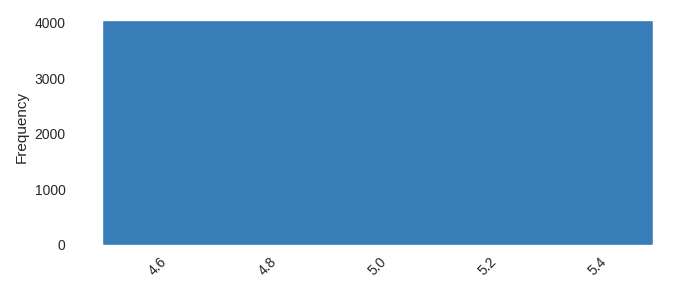

In [ ]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile

## Dataprep

In [ ]:
!pip install dataprep

In [ ]:

from dataprep.eda import create_report
create_report(df)

Probar luego de normalizar las variables categoricas fijandonos que este bien el orden de hacer las coorrelaciones.

## Survival months


In [ ]:
# Histograma survival months

f, axs = plt.subplots(figsize=(10, 4))
sns.histplot(data=df, x="Survival Months", multiple="stack", shrink=.95, legend=True, palette="Set2")
axs.set_title("Meses de sobrevida")
plt.axvline(x=60, color='red', linestyle='--')
plt.xticks(range(0, 110, 5) )
plt.tight_layout()
plt.show()

Histograma donde en el eje X tenemos la cantidad de meses de supervivencia tras el diagnostico y en el eje Y la cantidad de registros. La linea roja punteada marca los 60 meses (5 años).
Se ve que hay mayor volumne de registros de supervivientes de mas de 46 meses. Podria deberse a un sesgo en la toma de muestra?


In [ ]:
# Cuantos sobrevivieron mayores de 46 meses
cuaretayseisMAYOR = []
cuarentayseisMENOR = []

for i in df["Survival Months"]:
    if i >= 46:
        cuaretayseisMAYOR.append(i)
    else:
        cuarentayseisMENOR.append(i)

print("<=46:", len(cuaretayseisMAYOR),"\n","<46:",len(cuarentayseisMENOR))

# Cuantos sobrevivieron mayores de 60 meses

sesentaMAYOR = []
sesentaMENOR = []

for i in df["Survival Months"]:
    if i >= 60:
        sesentaMAYOR.append(i)
    else:
        sesentaMENOR.append(i)

print(">=60:", len(sesentaMAYOR),"\n","<60:",len(sesentaMENOR))

# Cuantos sobrevivieron mayores de 60 meses
entre60y46 = []

for i in df["Survival Months"]:
    if i >= 46 and i < 60:
        entre60y46.append(i)

print("entre 46 y 60:","\n",len(entre60y46))

print("mayores a 60 meses:",2821/4024*100,"%","\n","menores a 60 meses:", 1203/4024*100,"%" )

Con este analisis veo cuantos registros sobrevivieron:
- menos de 46 meses: 433 registros,<br>
- entre 46 y 60 meses: 770 registros,<br>
- menos de 60 meses: 1203 registros, 29.9% de la muestra,<br>
- más de 60 meses: 2821 registros, 70.1% de la muestra. <br>

In [ ]:

fig_violinplot_sm = px.violin(df, y='Survival Months', title='Survival Months')
fig_violinplot_sm.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm.show()

En este grafico de violin vemos como el grueso de los registros tienen, a grandes razgos, sobrevidas entre 50 y 100 meses.

### Survival Months vs features

### SM - 6th Stage

In [ ]:
fig_violinplot_sm_6 = px.violin(df,
                                x='6th Stage',
                                y='Survival Months',
                                color='6th Stage',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - 6th Stage')
fig_violinplot_sm_6.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_6.show()

In [ ]:
fig_violinplot_sm_6_sv = px.violin(df,
                                x='6th Stage',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - 6th Stage')
fig_violinplot_sm_6_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_6_sv.show()

En estos violines se ve como las categorias de 6th Stage mas altas IIIB y IIIC parecen tener mas volumen en Survival Months menores, mientras que las otras 3 categorias: IIA IIIA y IIB tienen el cuerpo del violin mas definido hacia survival months mas altos.

### SM - Differentiate

In [ ]:
fig_violinplot_sm_d = px.violin(df,
                                x='Differentiate',
                                y='Survival Months',
                                color='Differentiate',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Differentiate')
fig_violinplot_sm_d.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_d.show()

In [ ]:
fig_violinplot_sm_d_sv = px.violin(df,
                                x='Differentiate',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Differentiate')
fig_violinplot_sm_d_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_d_sv.show()

Si vemos la distribucion de la supervivencia segun los estados de diferenciacion, vemos como los mas indifernciados llegan a tener registros en sobrevidas menores, mientras que los mejor diferenciados se concentran más en sobrevidas mayores.

### SM - Estrogen Status

In [ ]:
fig_violinplot_sm_es = px.violin(df,
                                x='Estrogen Status',
                                y='Survival Months',
                                color='Estrogen Status',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Estrogen Status')
fig_violinplot_sm_es.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_es.show()

In [ ]:
fig_violinplot_sm_es_sv = px.violin(df,
                                x='Estrogen Status',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Estrogen Status')
fig_violinplot_sm_es_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_es_sv.show()

Para Estrogen status Negative hay un cumulo de observaciones con menores survival months. En cambio los Positive se concentran mas en survival months mayores

### SM - Progesterone Status

In [ ]:
fig_violinplot_sm_ps = px.violin(df,
                                x='Progesterone Status',
                                y='Survival Months',
                                color='Progesterone Status',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Progesterone Status')
fig_violinplot_sm_ps.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_ps.show()

Se observa el mismo fenomeno que para Estrogen Status pero en Progesteron Status es menos abundante la cola de survival months bajos para los Negative.

In [ ]:
fig_violinplot_sm_ps_sv = px.violin(df,
                                x='Progesterone Status',
                                y='Survival Months',
                                color='Sobrevida',
                                color_discrete_sequence=px.colors.qualitative.Plotly,
                                title='Survival Months - Progesterone Status')
fig_violinplot_sm_ps_sv.update_layout(width=600, height=400, title_font_size=20)
fig_violinplot_sm_ps_sv.show()

### Scatter Survival Months vs Age

In [ ]:
fig = px.histogram(df, "Age", color="Sobrevida", marginal="box", hover_data=df.columns, title="Edad segun Sobrevida")
fig.update_layout(width=600, height=400, title_font_size=20)
fig.show()

Aqui vemos como se distribuyen las edades de las pacientes de la muestra, y para aquellas con sobrevida mayor a 60 meses (Sobrevida True, Azul) y menores de 60 meses (Sobrevida False, Rojo).
Las medidas de cada grupo se pueden ver en el hover que permite pyplot express:<br>
Edades en Sobrevida True, Azul: max: 69, min: 30, mediana: 54, Q1: 47, Q3: 61<br>
Edades en Sobrevida False, Rojo: max: 69, min: 30, mediana: 54, Q1: 47, Q3: 62. <br>
Es decir no parece que la edad afecte la variable objetivo Sobrevida ya que ambas muestras tienen casi los mismos parametros.

In [ ]:

fig_scatter_sm_age = px.scatter(df,
                                x="Survival Months",
                                y='Age',
                                title='Survival Months vs Age',
                                color="Differentiate",
                                )
fig_scatter_sm_age.update_layout(width=900, height=400, title_font_size=20)
fig_scatter_sm_age.show()

En este scatter de tamaño tumoral segun meses de supervivencia y edad, si bien no es muy claro y se ve mucha acumulacion de puntos en los de sobrevida mayor a 46 meses lo cual dificulata la interpreacion, pareciera que hay mayor densidad de tamaños tumorales altos en comparacion con otros tamaños tumorales en los sobrevivientes menosres de 46 meses. Igualmente no tengo certeza y quedaria para futuras lineas investigar por algun otro metodo esta idea.

In [ ]:
# PROBANDO BUBBLE PLOT

fig_scatter_sm_age = px.scatter(df.query("Sobrevida==True"),
                                x='Survival Months',
                                y="Age",
                                size="Tumor Size",
                                title='Survival Months vs Age',
                                color="N Stage", # probe con distintas variables y ninguna muestra un patron
                                )
fig_scatter_sm_age.update_layout(width=900, height=400, title_font_size=20)
fig_scatter_sm_age.show()


In [ ]:

fig_es_age = sns.boxplot(df, x="Estrogen Status", y='Age', hue="Estrogen Status", palette="pastel").set(title='Estrogen Status vs Age')


En estos boxplot vemos la distribucion de las edades de las pacientes segun sus receptores estrogenicos positivos o negativos. No parece haber grandes diferencias en cuando a la mediana (aprox 44-43) ni los primeros cuartiles (aprox 46), pero si en los tercer cuartiles: mayor de 60 para los positivos y menos de 60 los negativos.

In [ ]:
fig_es_age = sns.boxplot(df, x="Progesterone Status", y='Age', hue="Progesterone Status", palette="pastel").set(title='Progesterone Status vs Age')


Para los receptores de progesterona, parece que la edad es apenas mayor en las pacientes con dichos receptores negativos.

## 6th stage

In [ ]:
# 6th Stage distribucion

f, axs = plt.subplots(figsize=(4, 4))
sns.histplot(data=df, x="6th Stage", legend=True, palette="Set2",)
axs.set_title("Distribucion de casos segun 6th Stage")
plt.tight_layout()
plt.show()

#axs.set_xticklabels([0, "IIA", "IIIA", "IIB", "IIIB", "IIIC"])

En el histogrma univariado de 6th Stage vemos como se distribuyen los casos segun 6th Stage. La mayoria son de 6th Stage bajo: IIA, IIB, IIIA, seguidos de IIIC y la menor cantidad IIIC.
Debajo veremos la cantidad de cada categoria:

In [ ]:
df["6th Stage"].value_counts()

In [ ]:
# pie plot de 6th Stage distribucion :  me da mal la legenda
import plotly.graph_objects as go

labels = df["6th Stage"].unique()
values = df["6th Stage"].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo="value+percent", hoverinfo="skip", title="Distribucion de 6th Stage", titleposition="top center" )])
fig.show()

In [ ]:
# pie plot a mano

import matplotlib.pyplot as plt
import numpy as np

valores = np.array([1305, 1050, 1130, 67, 472])
etiquetas = ["IIA", "IIIA","IIB",  "IIIB","IIIC"]
colores = ["#EA5355","#699EC9","#B27ABA","#FF9F40", "#7AC377"]
plt.pie(valores, labels=etiquetas, labeldistance=1.1, autopct='%1.1f%%', pctdistance=0.75, colors=colores, startangle=90, counterclock=True )
plt.title("Distribucion de 6th Stage")
#plt.legend(etiqueta, loc="upper right", bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.show()


En este pieplot se visualiza facilmente como las categorias IIA IIB y IIIA son las predomnantes, con sus respectivos porcentajes del total de observaciones (32.4, 28.1, y 26.1% respectivamente) . Y IIIC y IIB quedan con menor proporcion de casos: 11.7 y 1.7 % repestivamente.

### 6th Stage vs features

In [ ]:
# los 3 analisis juntos de 6th Stage: TNA


fs, axs = plt.subplots(1,3,figsize=(10,4), sharey=True, sharex=True)

TS = sns.histplot(data=df, x="6th Stage", hue="T Stage", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[0]).set_title("por T Stage")

NS = sns.histplot(data=df, x="6th Stage", hue="N Stage", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[1]).set_title("por N Stage")

AS = sns.histplot(data=df, x="6th Stage", hue="A Stage", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[2]).set_title("por A Stage")

fs.suptitle("Distribucion de 6th Stage")

plt.tight_layout()

plt.show()



**T Stage:** <br>
Los pocos T Stage 4 corresponden con las categorias más altas de 6th stage, aunque tambien a T Stage 1 con el 6th Stage más alto.
A su vez, la mayoria de los T Stage 1 corresponden con 6th Stage Bajo.
Los T Stage intermedios 2 y 3 teinen más casos en 6th Stage intermedio bajo pero tambien casos en el mas alto.

**N Stage:**<br>
Los N Stage 3 corresponden todos a 6th Stage 5. Luego, se encuentran los de N Stage 1 en todas las categorias de 6th Stage y los N2 en categorias intermedia baja y alta de 6th Stage.

**A Stage:**<br>
A Stage distant solo corresponde con pocos casos, y estos pertenecen a las categorias de mayor gravedad de 6th Stage

In [ ]:
f, axs = plt.subplots(figsize=(10, 4))
sns.histplot(data=df, x="Survival Months", hue="6th Stage", multiple="stack" , shrink=.95, legend=True, palette="Set1")
axs.set_title("Meses de sobrevida segun 6th Stage")
plt.axvline(x=60, color='red', linestyle='--')
plt.xticks(range(0, 110, 5))
plt.tight_layout()
plt.show()

#'layer', 'stack', 'fill', 'dodge'


La cantidad de 6th Stage de mayor gravedad (IIIB, violeta y IIIC, amarillo) parecen mantener la cantidad de casos constante en todos los meses de sobrevida, teniendo tambien mayor proporcion de casos en los de menores meses de supervivencia ya que estos presentan menos casos de 6th IIA, IIIA y IIB los tienen máyor proporción de registros con menores sobrevidas.

## Receptores hormonales

### HR vs 6th Stage

In [ ]:
fs, axs = plt.subplots(2,1,figsize=(5,5), sharey=True, sharex=True)

ER = sns.histplot(data=df, x="6th Stage", hue="Estrogen Status", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[0]).set_title("Estrogen Status")

PR = sns.histplot(data=df, x="6th Stage", hue="Progesterone Status", multiple="stack", shrink=.95, legend=True, palette="Set2", ax=axs[1]).set_title("Progesterone Status")

fs.suptitle("Distribucion de 6th Stage")

plt.tight_layout()
plt.show()


Para ambos receptores se ve como la mayoria de las observaciones son positivos para receptores de Estrogenos y de Progesterona. Sin embargo, la proporcion de negativos es mas alta en 6th Stages mas altos.

### Contingencia Estrogen - Progesterone

In [ ]:
# tabla de contingencia heatmap

# Crear la tabla de contingencia
tabla_contingencia_normalizada = pd.crosstab(df["Estrogen Status"], df["Progesterone Status"], normalize=True) #
tabla_contingencia = pd.crosstab(df["Estrogen Status"], df["Progesterone Status"], normalize=False) #
# Mostrar la tabla de contingencia
print(tabla_contingencia)

# Visualizar con un heatmap
fs, ax = plt.subplots(figsize=(2,2))
ax =sns.heatmap(tabla_contingencia, annot=True, cmap="tab20b", fmt='d',  cbar=False, annot_kws={"size": 15} ) #
ax.set_xlabel('Progesterone Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()


# Visualizar con un heatmap
fs, ax = plt.subplots(figsize=(2,2))
ax =sns.heatmap(tabla_contingencia_normalizada, annot=True, fmt=".1%", cmap="tab20b",  cbar=False, annot_kws={"size": 15} )
ax.set_xlabel('Progesterone Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(2,1, figsize=(8,4), sharex=True, sharey=True)

sns.histplot(data=df, x="Survival Months", hue="Estrogen Status", multiple="stack", shrink=.9, alpha=0.80, legend=True, palette="Set1", ax=axs[0])
plt.axvline(x=60, color='red', linestyle='--')

sns.histplot(data=df, x="Survival Months", hue="Progesterone Status", multiple="stack", shrink=.9, alpha=0.80, legend=True,palette="Set1", ax=axs[1])
plt.axvline(x=60, color='red', linestyle='--')

f.suptitle("Meses de sobrevida segun Receptores Hormonales")
plt.xticks(range(0, 110, 5))

f.tight_layout()
plt.show()

En la distribución en los meses de supervivenica, ambos muestran menor proporción de negativos en los casos de supervivientes de mas de 46 meses. Esta gráfica también se evidencia que hay más negativos para receptores de progesterona que negativos para receptores de estrógenos.

## Differentiate , survival months

In [ ]:
#
f, axs = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x="Survival Months", hue="Differentiate", multiple="stack" , shrink=.95, legend=True, palette="Set1")
plt.axvline(x=60, color='red', linestyle='--')
f.suptitle("Meses de sobrevida segun Differentiate")
plt.xticks(range(0, 110, 10))
plt.tight_layout()
plt.show()

## Differentiate

In [ ]:
categoriasDif = df["Differentiate"].value_counts()
categoriasDif

In [ ]:
orden_diferentiated = ["Well differentiated","Moderately differentiated","Poorly differentiated","Undifferentiated"]
chart = sns.FacetGrid(df, col='Differentiate', margin_titles=False, aspect=1, col_order=orden_diferentiated)
chart.map(sns.histplot, 'Survival Months', palette="Set1")



La serie de facetados según grado de diferenciación muestra como la mayoría de los registros son de difereciacion moderada. Los pobremente diferenciados parecen tener mayor proporcion en los de supervivencias menores a 46 meses.

# Crosstabs 6th Stage vs Variables

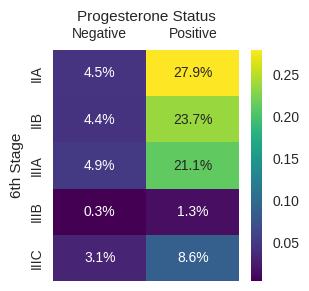

In [ ]:
# crosstab Progesterona vs 6th Stage

PS6th = pd.crosstab(df["6th Stage"], df["Progesterone Status"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,3))
ax =sns.heatmap(PS6th, annot=True, cmap="viridis", fmt='.1%', annot_kws={"size": 10}, cbar=True ) #
ax.set_xlabel('Progesterone Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

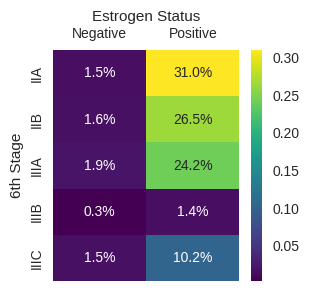

In [ ]:
# crosstab Estrogenos vs 6th Stage

ES6th = pd.crosstab(df["6th Stage"], df["Estrogen Status"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,3))
ax =sns.heatmap(ES6th, annot=True, cmap="viridis", fmt='.1%',  cbar=True, annot_kws={"size": 10} ) #
ax.set_xlabel('Estrogen Status', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

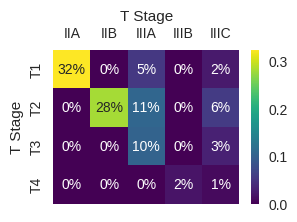

In [ ]:
# crosstab T Stage vs 6th Stage

TS6th = pd.crosstab( df["T Stage"],df["6th Stage"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,2))
ax =sns.heatmap(TS6th, annot=True, cmap="viridis", fmt='.0%',  cbar=True, annot_kws={"size": 10} ) #
ax.set_xlabel('T Stage', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

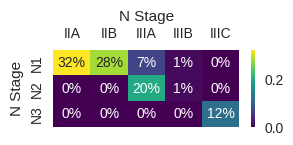

In [ ]:
# crosstab N Stage vs 6th Stage

NS6th = pd.crosstab( df["N Stage"],df["6th Stage"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,1))
ax =sns.heatmap(NS6th, annot=True, cmap="viridis", fmt='.0%',  cbar=True, annot_kws={"size": 10} ) #
ax.set_xlabel('N Stage', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0)
plt.show()

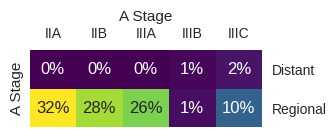

In [ ]:
# crosstab A Stage vs 6th Stage

AS6th = pd.crosstab( df["A Stage"],df["6th Stage"], normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(3,1))
ax =sns.heatmap(AS6th, annot=True, cmap="viridis", fmt='.0%',  cbar=False, annot_kws={"size": 12} ) #
ax.set_xlabel('A Stage', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.yaxis.tick_right()
plt.yticks(rotation=0)
plt.show()

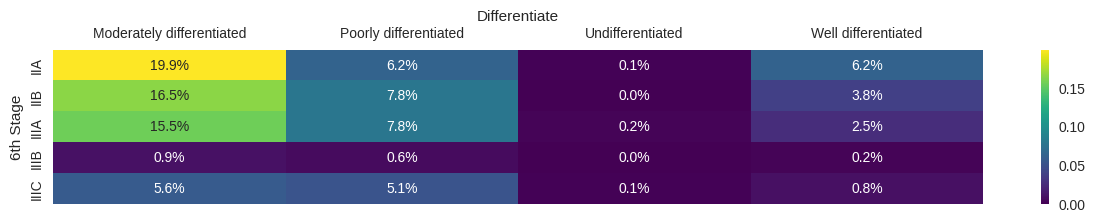

In [ ]:
# crosstab Differentiate vs 6th Stage

D6th = pd.crosstab( df["6th Stage"],df["Differentiate"],  normalize=True) #Agregamos los valores en relativo

fs, ax = plt.subplots(figsize=(15,2))
ax =sns.heatmap(D6th, annot=True, cmap="viridis", fmt='.1%',  cbar=True, annot_kws={"size": 10},  ) #
ax.set_xlabel('Differentiate', loc="center",)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


plt.show()

# Conclusiones


* Los meses de supervivencia van de 1 a 107 meses. A partir de los 46 meses aumentan la cantidad de registros. Se ven  1203 registros de supervivencia menor a 60 meses (29.9% de la muestra), y 2821 registros que sobrevivieron más de 60 meses: 70.1% de la muestra. La variable objetivo “Sobrevida” se encuentra desbalanceada.
* Los registros con 6th stage IIA, IIB y IIA, en conjunto representan el 86.6% de la muestra.
* Los 6th Stage de mayor gravedad (IIIB y IIIC), 13.4% de la muestra, tienen máyor proporción de registros con menores sobrevidas.
* Los registros con receptores estrogénicos negativos representan una proporción en supervivencias menores a 50 meses mayor que los positivos. Dicha tendencia se repite en el caso de los receptores de progesterona aunque aquí menos marcado. La proporción de receptores hormonales negativos es mayor en 6th Stages mayores (IIIB y IIIC).
* 82% de los registros tiene ambos receptores hormonales positivos.
* La edad de las pacientes parece ser mayor en los casos de receptores
progestágenos negativos y menor en los de receptores estrogénicos
negativos.


# ⏩ CONINUANDO POST PREENTREGA SEPTIEMBRE

## ESTANDARIZACION DE VARIABLES CATEGORICAS ORDINALES
<br>


In [ ]:
df.columns

Index(['Age', 'Race', 'T Stage', 'N Stage', '6th Stage', 'Differentiate',
       'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Regional Node Positive', 'Survival Months',
       'Sobrevida', 'RNP/RNE'],
      dtype='object')

NUMERICAS
  * Age
  * Tumor Size
  * Survival Months
  * Regional Node Examined
  * Regional Node Positive
  * RNP/RNE
 <br>

<br>
CATEGORICAS <br>

BINARIAS <br>
  * A Stage
  * Estrogen Status
  * Progesterone Status
  * Sobrevida
<br>

ORDINALES<br>
  * T Stage
  * N Stage
  * Diffrentiate
  * 6th Stage
<br>

NOMINALES <br>
  * Race

### ORDINAL ENCODER

  * T Stage
  * N Stage
  * Diffrentiate
  * 6th Stage

In [ ]:
df['T Stage'].value_counts()

,count
T Stage,
T2,1786
T1,1603
T3,533
T4,102


In [ ]:
# T Stage
df_TS = df [['T Stage']].copy()
encoder = OrdinalEncoder(categories = [['T1', 'T2', 'T3', 'T4']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_TS['df_TS_encoded'] = encoder.fit_transform(df_TS[['T Stage']]).ravel()
df_TS[['T Stage','df_TS_encoded']].drop_duplicates()

,T Stage,df_TS_encoded
0,T1,0.0
1,T2,1.0
2,T3,2.0
8,T4,3.0


In [ ]:
df['N Stage'].value_counts()

,count
N Stage,
N1,2732
N2,820
N3,472


In [ ]:
# N Stage
df_NS = df [['N Stage']].copy()
encoder = OrdinalEncoder(categories = [['N1', 'N2', 'N3']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_NS['df_NS_encoded'] = encoder.fit_transform(df_NS[['N Stage']]).ravel()
df_NS[['N Stage','df_NS_encoded']].drop_duplicates()

,N Stage,df_NS_encoded
0,N1,0.0
1,N2,1.0
2,N3,2.0


In [ ]:
df['Differentiate'].value_counts()

,count
Differentiate,
Moderately differentiated,2351
Poorly differentiated,1111
Well differentiated,543
Undifferentiated,19


In [ ]:
# Differentiate
df_D = df [['Differentiate']].copy()
encoder = OrdinalEncoder(categories = [['Well differentiated', 'Moderately differentiated', 'Poorly differentiated', 'Undifferentiated']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_D['df_D_encoded'] = encoder.fit_transform(df_D[['Differentiate']]).ravel()
df_D[['Differentiate','df_D_encoded']].drop_duplicates()

,Differentiate,df_D_encoded
0,Poorly differentiated,2.0
1,Moderately differentiated,1.0
6,Well differentiated,0.0
277,Undifferentiated,3.0


In [ ]:
df['6th Stage'].value_counts()

,count
6th Stage,
IIA,1305
IIB,1130
IIIA,1050
IIIC,472
IIIB,67


In [ ]:
# 6th Stage

df_6S = df [['6th Stage']].copy()
encoder = OrdinalEncoder(categories = [['IIA', 'IIIA', 'IIB', 'IIIB', 'IIIC']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_6S['df_6S_encoded'] = encoder.fit_transform(df_6S[['6th Stage']]).ravel()
df_6S[['6th Stage','df_6S_encoded']].drop_duplicates()

,6th Stage,df_6S_encoded
0,IIA,0.0
1,IIIA,1.0
2,IIIC,4.0
4,IIB,2.0
98,IIIB,3.0


### LABEL ENCODER
  * Race

In [ ]:
LE = LabelEncoder()

In [ ]:
df['Race'].value_counts()

,count
Race,
White,3413
Other,320
Black,291


In [ ]:
df_R = df['Race']
df_R = LE.fit_transform(df_R)
df_R = pd.DataFrame(df_R)
df_R.value_counts() # veo que whte es 2, other es 1 y Black es 0
df_R.rename(columns={0: 'Race'}, inplace=True)
df_R

,Race
0,2
1,2
2,2
3,2
4,2
...,...
4019,1
4020,2
4021,2
4022,0


### ONE HOT ENCODER

  * A Stage
  * Estrogen Status
  * Progesterone Status
  * Sobrevida

In [ ]:
df_binarias = df[['A Stage', 'Estrogen Status', 'Progesterone Status', 'Sobrevida']]

In [ ]:
# Aplicar OneHotEncoder
OHE = OneHotEncoder(sparse_output=False, drop='first')  # Utilizando drop='first' para evitar multicolinealidad

encoded_binarias = OHE.fit_transform(df_binarias)

encoded_df = pd.DataFrame(encoded_binarias, columns=OHE.get_feature_names_out(['A Stage', 'Estrogen Status', 'Progesterone Status', 'Sobrevida']))


# Aca tendria que renombrar los titulos como: Sobrevida>60 A_Stage_Regional Estrogen_Receptors_Positive Progesterone_Receptors_Positive

,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Sobrevida_1
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,0.0


### NOMINALES - ESCALARLOS
  * Age
  * Tumor Size
  * Survival Months
  * Regional Node Examined
  * Regional Node Positive
  * RNP/RNE

In [ ]:
#Creating a copy of data
ds = df[['Age','Tumor Size', 'Survival Months', 'Regional Node Examined', 'Regional Node Positive', 'RNP/RNE']].copy()

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns= ds.columns)

scaled_ds.head()

,Age,Tumor Size,Survival Months,Regional Node Examined,Regional Node Positive,RNP/RNE
0,1.565253,-1.253661,-0.492961,1.190676,-0.618172,-0.992386
1,-0.443222,0.214345,-0.405695,-0.044095,0.164807,0.106887
2,0.449434,1.540287,0.161530,-0.044095,0.556296,0.604671
3,0.449434,-0.590691,0.554224,-1.525820,-0.618172,0.604671
4,-0.777968,0.498475,-0.929288,-1.402343,-0.618172,0.023923


## CONCATENANDO

In [ ]:
# concateno todos los df los Categoricos Normalizados y los numericos Escalados,

df_concatenado = pd.concat([df_6S, df_TS, df_NS, df_D, df_R, encoded_df, scaled_ds], axis=1)
df_concatenado.drop(columns=['6th Stage', 'T Stage', 'N Stage', 'Differentiate' ], inplace=True)
df_concatenado.head()

# cambiarle nombres a las variables

,df_6S_encoded,df_TS_encoded,df_NS_encoded,df_D_encoded,Race,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Sobrevida_1,Age,Tumor Size,Survival Months,Regional Node Examined,Regional Node Positive,RNP/RNE
0,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,1.565253,-1.253661,-0.492961,1.190676,-0.618172,-0.992386
1,1.0,1.0,1.0,1.0,2,1.0,1.0,1.0,1.0,-0.443222,0.214345,-0.405695,-0.044095,0.164807,0.106887
2,4.0,2.0,2.0,1.0,2,1.0,1.0,1.0,1.0,0.449434,1.540287,0.161530,-0.044095,0.556296,0.604671
3,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,0.449434,-0.590691,0.554224,-1.525820,-0.618172,0.604671
4,2.0,1.0,0.0,2.0,2,1.0,1.0,1.0,0.0,-0.777968,0.498475,-0.929288,-1.402343,-0.618172,0.023923


In [ ]:
# cambio los nombres de las columnas asiquedan bonitos
df_ml = df_concatenado.copy()
df_ml.rename(columns={'df_6S_encoded': '6th Stage', 'df_TS_encoded': 'T Stage', 'df_NS_encoded': 'N Stage', 'df_D_encoded': 'Differentiate','A Stage_Regional':'A_Stage_Regional' , 'Estrogen Status_Positive': 'Estrogen_Positive',
       'Progesterone Status_Positive': 'Progesterone_Positive', 'Sobrevida_1': 'Sobrevida>60', 'df_R':'Race'}, inplace=True)
df_ml.head()



,6th Stage,T Stage,N Stage,Differentiate,Race,A_Stage_Regional,Estrogen_Positive,Progesterone_Positive,Sobrevida>60,Age,Tumor Size,Survival Months,Regional Node Examined,Regional Node Positive,RNP/RNE
0,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,1.565253,-1.253661,-0.492961,1.190676,-0.618172,-0.992386
1,1.0,1.0,1.0,1.0,2,1.0,1.0,1.0,1.0,-0.443222,0.214345,-0.405695,-0.044095,0.164807,0.106887
2,4.0,2.0,2.0,1.0,2,1.0,1.0,1.0,1.0,0.449434,1.540287,0.161530,-0.044095,0.556296,0.604671
3,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,0.449434,-0.590691,0.554224,-1.525820,-0.618172,0.604671
4,2.0,1.0,0.0,2.0,2,1.0,1.0,1.0,0.0,-0.777968,0.498475,-0.929288,-1.402343,-0.618172,0.023923


## Clasificar variables: Categoricas o Numericas

In [ ]:
# codigo para clasificar varibles en categoricas y numericas cuando ya tengo normalizadas las categoricas.. si tiene mas de 5 nuemros distitos es una variable numerica y sino esos numeros son las categorias

columns = list(df_ml.columns)
categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df_ml[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

#  salteando la primera columna las otras sis eran las mumericas
numeric_columns = numeric_columns[1:]

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['Tumor Size', 'Survival Months', 'Regional Node Examined', 'Regional Node Positive', 'RNP/RNE']
Categorical features:  ['6th Stage', 'T Stage', 'N Stage', 'Differentiate', 'Race', 'A_Stage_Regional', 'Estrogen_Positive', 'Progesterone_Positive', 'Sobrevida>60']


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   6th Stage               4024 non-null   float64
 1   T Stage                 4024 non-null   float64
 2   N Stage                 4024 non-null   float64
 3   Differentiate           4024 non-null   float64
 4   Race                    4024 non-null   int64  
 5   A_Stage_Regional        4024 non-null   float64
 6   Estrogen_Positive       4024 non-null   float64
 7   Progesterone_Positive   4024 non-null   float64
 8   Sobrevida>60            4024 non-null   float64
 9   Age                     4024 non-null   float64
 10  Tumor Size              4024 non-null   float64
 11  Survival Months         4024 non-null   float64
 12  Regional Node Examined  4024 non-null   float64
 13  Regional Node Positive  4024 non-null   float64
 14  RNP/RNE                 4024 non-null   

In [ ]:
df_ml[categoric_columns] = df_ml[categoric_columns].astype('int')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   6th Stage               4024 non-null   int64  
 1   T Stage                 4024 non-null   int64  
 2   N Stage                 4024 non-null   int64  
 3   Differentiate           4024 non-null   int64  
 4   Race                    4024 non-null   int64  
 5   A_Stage_Regional        4024 non-null   int64  
 6   Estrogen_Positive       4024 non-null   int64  
 7   Progesterone_Positive   4024 non-null   int64  
 8   Sobrevida>60            4024 non-null   int64  
 9   Age                     4024 non-null   float64
 10  Tumor Size              4024 non-null   float64
 11  Survival Months         4024 non-null   float64
 12  Regional Node Examined  4024 non-null   float64
 13  Regional Node Positive  4024 non-null   float64
 14  RNP/RNE                 4024 non-null   

### Matriz de correlacion

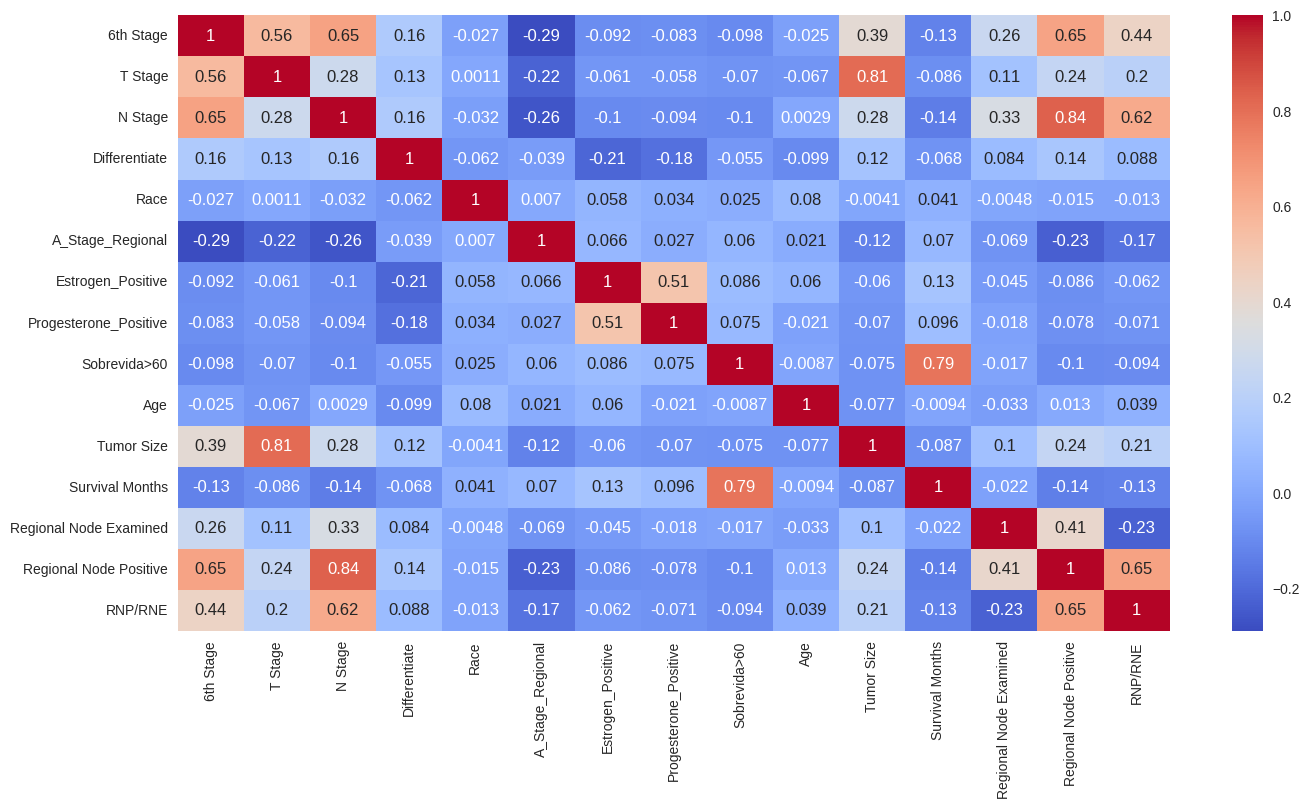

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_ml.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df_ml.corr()

# mostrar los coeficientes de correlacoin de la variable Sobrevida>60
corr_matrix['Sobrevida>60'].sort_values(ascending=False)

,Sobrevida>60
Sobrevida>60,1.000000
Survival Months,0.785721
Estrogen_Positive,0.086025
Progesterone_Positive,0.075019
A_Stage_Regional,0.059910
Race,0.025335
Age,-0.008691
Regional Node Examined,-0.016516
Differentiate,-0.055148
T Stage,-0.070135


Aqui vemos qué variables se relacionan más estrechamente con la variable objetivo Sobrevida>60: de manera negativa Regional Node Positve y N Stage. <br>
Ignorando Survival Months que es de donde deriva Sobrevida>60

# Machine Learning

In [ ]:
# elijo que variables sacar del modelo (drop) y cual es la variable objetivo (y) y cuales voy a usar para la prediccion

Xe = df_ml.drop(columns=['Survival Months','Sobrevida>60']) # X entera
X = df_ml.drop(columns=['Sobrevida>60','Survival Months', 'Tumor Size', 'T Stage', 'N Stage','A_Stage_Regional', 'Differentiate',
 'Regional Node Examined', 'Regional Node Positive', 'Race']) # saco la Target, y las que se resuen en 6th, y los ganglios, que se resumen en RNP/RNE, y RACE
y = df_ml['Sobrevida>60']

## PCA X entera

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en train y test sets (ej: 80% train, 20% test)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

Xe_train = pca.fit_transform(Xe_train)
Xe_test = pca.transform(Xe_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.40321524, 0.14310975, 0.1349362 ])

In [ ]:
from sklearn.linear_model import LogisticRegression
Reg_Log = LogisticRegression(random_state = 0)
Reg_Log.fit(Xe_train, ye_train)

# Predicting the Test set results
ye_pred = Reg_Log.predict(Xe_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ye_test, ye_pred)
cm

array([[  0, 241],
       [  1, 563]])

## Con seleccion de variables X

In [ ]:
list(X)

['6th Stage', 'Estrogen_Positive', 'Progesterone_Positive', 'Age', 'RNP/RNE']

In [ ]:
# genero los grupos de train y test
from sklearn.model_selection import train_test_split

# Dividir en train y test sets (ej: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Cual modelo me seria mejor?

Sabiendo que mi pregunta de hipotesis es de clasificacion, solo desarrollaré algoritmos de clasificacion.

Aqui hare la prueba de modelos para ver cual es el que mejor se ajusta a mi variable objetivo Supervivencia, tomando como metrica **accuracy** (luego lo con hare F1 y AUC)

In [ ]:
# Diccionario de modelos de clasificacion

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),

}

model_names = []
f1 = []  ##
roc_auc = []


# Entrenamiento y evaluacion, para cada modelo de clasificacion, y que me de como medida el accuracie
for name, clf in classification_models.items():
    clf.fit(X_train, y_train) # datos de entrenamiento
    f1s = clf.f1_score(X_test, y_test) # evaluando los modelos  ##
    rocaucscore = clf.roc_auc_score(X_test, y_test)
    model_names.append(name)
    f1.append(f1s)  ##
    roc_auc.append(rocaucscore)
    print(f"{name} accuracy: {score:.2f}")  ##



AttributeError: 'LogisticRegression' object has no attribute 'f1_score'

Metricas de evaluacion
https://arize.com/blog-course/f1-score/#:~:text=F1%20score%20computes%20the%20average,of%20the%20predictions%20were%20correct.

### MARIA TIPS  septiembre

Como mi dataset esta desbalanceado,
  - Calcularle recall, precision, **F1, RocAuc,** accurancy para cada modelo,
  - graficarlo en grafico radar,
  - sumarle interpretaciones de cada metrica respecto al problema especifico.
  - Evaluar sobre el conjunto de **testeo pero tambien en el conjunto de entrenamiento** (porque los random forest overfitean)
  - Luego ajustar hiperparametros a los modelos que mejor rendimiento haga.



1) me queda como planear el modelo:
  - regresión logística con todas las variables incluso las categóricas encodeadas,
  - RandomForestClasification
  - light gbm

2) Ademas.. y de la mano de lo del ejercicio de la clase 21 qeu era mejor no estandarizar los numericos, aca diriamos lo mismo, para ver los coeficientes? o al ser mi target featue categorica no aplica?
-
2) Estandarizar los numericos aplica si es que usas la regresión logistica,  pero como en general uno procesa una sola vez y lo usa para todos los modelos nos olvidamos de eso. En los modelos robustos lo que solemos mirar es la lista _featrure_importance.

3) Las metrics de F1 y RocAuc se pueden usar para el modelo de regresion logistica (categorica)

4) Y.. no se si veremos mas modelos distintos conalun otro enfoque que pueda darle aa mi dataset para la variable objetivo, y si pensas que dicotomizarla vale la pena o se pierde detalle que seria mas analizble entonces que deberia cambiar la hipotesis problema a resolver a algo mas abierto a investigar la sobrevida como variable contnua.?
-
Dejala dicotómica porque si modelás como predicción de cantidad de años (o meses) de sobrevida seguramente no sea tan preciso. De última esa regresión podés hacerla como un extra a la entrega.

5)por otro lado aca continue el ej de la clae 21 con la no estandarizcion de las nmericas la interpretacion, y luego hice el ejercicio con Stats Model … me encantaria tener tu feedback en eso si podes
-

. <br>


Entrenando modelos de clasificacion:

  - Logistic Regression
  - Random Forest
  - Gradient Boosting (XGBoost or LightGBM)
  - Support Vector Machine (SVM)

Y evaluacion de metricas en el test set




#### LogisticRegression

In [ ]:

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, F1-Score: {log_reg_f1}, ROC-AUC: {log_reg_roc_auc}")


Logistic Regression - Accuracy: 0.7068322981366459, Precision: 0.7070707070707071, Recall: 0.9929078014184397, F1-Score: 0.8259587020648967, ROC-AUC: 0.5622664135840616


#### Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}, ROC-AUC: {rf_roc_auc}")



Random Forest - Accuracy: 0.6173913043478261, Precision: 0.7077922077922078, Recall: 0.7730496453900709, F1-Score: 0.7389830508474576, ROC-AUC: 0.5319627144580795


In [ ]:
# en random fores puedo ver feature importance,
fimp_rf = pd.Series(data = rf.feature_importances_, index=X.columns).sort_values(ascending=True)

import plotly.express as px

fig = px.bar(
    x=fimp_rf.values,
    y=fimp_rf.index,
    orientation='h',
    title="Feature Importance"
)

# Ajustar el tamaño de la figura
fig.update_layout(
    width=800,
    height=600
)

fig.show()

# buscar sacar la x e y de los ejes

#### XGBoost Classifier

In [ ]:

from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-Score: {xgb_f1}, ROC-AUC: {xgb_roc_auc}")



XGBoost - Accuracy: 0.6434782608695652, Precision: 0.7039764359351989, Recall: 0.8475177304964538, F1-Score: 0.7691069991954947, ROC-AUC: 0.5102446955651688


#### Support Vector Machine Classifier

In [ ]:

from sklearn.svm import SVC

# Train SVM (with probability=True to get probabilities for ROC-AUC)
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1-Score: {svm_f1}, ROC-AUC: {svm_roc_auc}")



SVM - Accuracy: 0.7093167701863354, Precision: 0.7083333333333334, Recall: 0.9946808510638298, F1-Score: 0.827433628318584, ROC-AUC: 0.5313300079456167


#### Dataframe con las metricas de los modelos

In [ ]:

# Create a DataFrame with the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [log_reg_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
    'Precision': [log_reg_precision, rf_precision, xgb_precision, svm_precision],
    'Recall': [log_reg_recall, rf_recall, xgb_recall, svm_recall],
    'F1-Score': [log_reg_f1, rf_f1, xgb_f1, svm_f1],
    'ROC-AUC': [log_reg_roc_auc, rf_roc_auc, xgb_roc_auc, svm_roc_auc]
})

results

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.706832,0.707071,0.992908,0.825959,0.562266
1,Random Forest,0.617391,0.707792,0.773050,0.738983,0.531963
2,XGBoost,0.643478,0.703976,0.847518,0.769107,0.510245
3,SVM,0.709317,0.708333,0.994681,0.827434,0.531330


### HELP aca: Para modelos de clasificacion binaria con variable target desbalanceada, usar F1 o RocAuc,, en vez de accuracy

https://medium.com/@chanakapinfo/understanding-roc-and-auc-in-model-evaluation-88fe4ac7dfc7

https://www.linkedin.com/pulse/understanding-performance-metrics-machine-learning-precision-saini/

https://encord.com/blog/f1-score-in-machine-learning/

https://www.evidentlyai.com/classification-metrics/explain-roc-curve

https://www.mariakhalusova.com/posts/2019-04-11-ml-model-evaluation-metrics-p1/

https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
light LBM

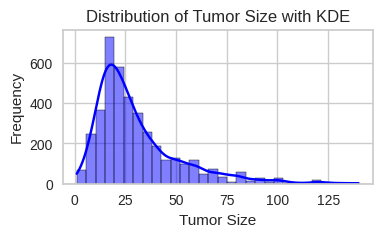

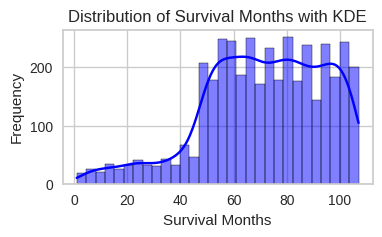

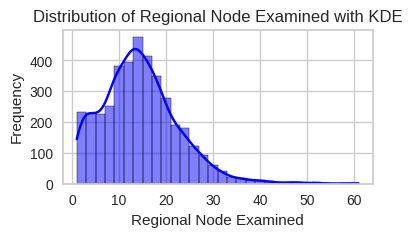

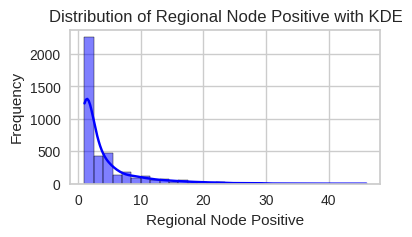

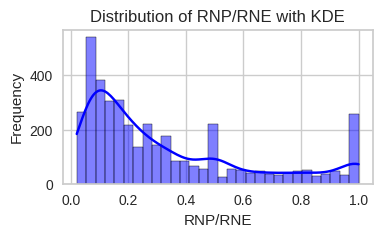

In [ ]:
#  HERE WE ARE SEENING THE DISTRIBUTION OF THE NUNERICAL FEATURES
#IF THEY ARE NORMALLY DISTRIBUTED THAN WE WILL USE THE "STANDARDISATION"
#BUT IF THEY ARE NOT NORMALLY DISTRIBUTED THAN WE WILL USE THE NORMALIZATION
 #( MEANS MINMAX SCALLING )........

# ver como se distribuyen las variables numericas
print(list(numeric_columns))

# Plot histograms with KDE
for col in numeric_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col} with KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot QQ plots for each numerical column
for col in numeric_columns:
    plt.figure(figsize=(2, 2))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    plt.show()
